In [1]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


class GenerateCities:
    """Generate Cities
    
    Generating coordinates and distance matrix randomly.
    
    Parameters
    ----------
    x : x coordinate of a city
    y : y coordinate of a city
    num_cities: number of cities
    random_state : seed
    
    Returns
    -------
    coords : city coordinates 
    matrix : distance numpy matrix
    """
    def __init__(self, x, y, num_cities, random_state=None):
        self.x = x
        self.y = y
        self.num_cities = num_cities
        self.random_state = random_state

    def generate(self):
        np.random.seed(self.random_state)
        x = np.random.randint(self.x, size=self.num_cities)
        y = np.random.randint(self.y, size=self.num_cities)
        coords = np.column_stack((x, y))
              
        return coords, np.int32(euclidean_distances(coords))

In [4]:
coords, cities = GenerateCities(100, 100, 10, 42).generate()
cities

array([[  0,  42,  73,  87,  66,  46,  91,  35,  62,  55],
       [ 42,   0, 108,  99,  84,  85,  98,  13,  72,  64],
       [ 73, 108,   0,  60,  46,  29,  71,  96,  60,  61],
       [ 87,  99,  60,   0,  21,  71,  11,  86,  27,  35],
       [ 66,  84,  46,  21,   0,  50,  29,  70,  16,  21],
       [ 46,  85,  29,  71,  50,   0,  80,  74,  58,  56],
       [ 91,  98,  71,  11,  29,  80,   0,  86,  29,  36],
       [ 35,  13,  96,  86,  70,  74,  86,   0,  59,  51],
       [ 62,  72,  60,  27,  16,  58,  29,  59,   0,   8],
       [ 55,  64,  61,  35,  21,  56,  36,  51,   8,   0]], dtype=int32)

In [204]:
import random
import array
from deap import base
from deap import creator
from deap import tools
from deap import algorithms


creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register('attr_cities', random.sample, range(1,10), 9)
toolbox.register('individual', tools.initIterate, creator.Individual, toolbox.attr_cities)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)


def eval_distance(individual):
    path = [0] + individual
    # print(path)
    return np.sum([cities[i,j] for i, j in zip(path, path[1:] + [path[0]])]),


def cxTwoOpt(ind1, ind2):
    # print(ind1, ind2)
    opt = True
    while opt:
        i = random.choice(range(1,8))
        j = random.choice(range(i,10))
        if i < j:
            ind1[i:j] = reversed(ind1[i:j])
            opt = False
    
    opt = True
    while opt:
        i = random.choice(range(1,8))
        j = random.choice(range(1,10))
        if i < j:
            ind2[i:j] = reversed(ind2[i:j])
            opt = False

    return ind1, ind2


toolbox.register('evaluate', eval_distance)
toolbox.register('mate', cxTwoOpt)
toolbox.register('mutate', tools.mutShuffleIndexes, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)
 

def main():
    pop = toolbox.population(n=200)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register('avg', np.mean)
    stats.register('std', np.std)
    stats.register('min', np.min)
    stats.register('max', np.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=20, stats=stats, halloffame=hof, verbose=True)
    return pop, log

_, log = main()

gen	nevals	avg    	std    	min	max
0  	200   	572.955	72.5737	392	727
1  	157   	524.485	60.3956	376	687
2  	151   	484.835	53.8497	337	623
3  	151   	473.37 	58.2643	337	643
4  	147   	449.885	54.9319	344	717
5  	134   	430.065	54.7358	314	650
6  	163   	428.31 	57.179 	314	626
7  	159   	415.005	53.605 	314	580
8  	152   	398.1  	48.5035	314	589
9  	146   	396.465	58.6476	302	657
10 	139   	386.75 	56.3245	302	600
11 	145   	384.1  	57.2381	302	643
12 	146   	376.86 	60.5512	302	691
13 	163   	372.015	55.3788	302	583
14 	150   	369.755	55.3183	302	625
15 	152   	361.89 	47.41  	302	549
16 	155   	368.835	61.7423	302	652
17 	152   	364.985	56.3324	302	622
18 	157   	362.765	52.5969	302	659
19 	139   	364.06 	57.8041	302	616
20 	151   	363.555	55.9725	302	565


In [207]:
log[0]['std']

72.57370718793412

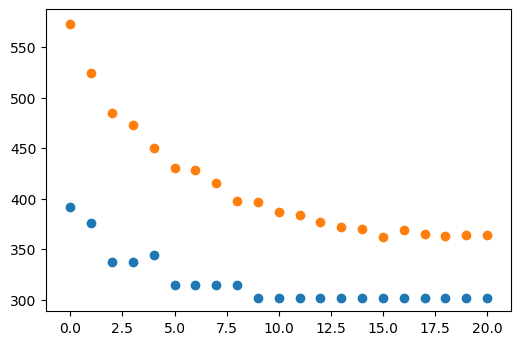

In [221]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=100)

iters = list(range(len(log)))
min_vals = [log[i]['min'] for i in range(len(log))]
avg_vals = [log[i]['avg'] for i in range(len(log))]

ax.scatter(iters, min_vals)
ax.scatter(iters, avg_vals)
plt.show()

In [208]:
len(log)

21

In [212]:
log[20]

AttributeError: 'dict' object has no attribute 'max'

In [190]:
import random
import array
from deap import base
from deap import creator
from deap import tools
from deap import algorithms


creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register('attr_cities', random.sample, range(1, 10), 9)
toolbox.register('individual', tools.initIterate, creator.Individual, toolbox.attr_cities)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)


def eval_distance(individual):
    return np.sum([cities[i,j] for i, j in zip([0] + individual, [0] + individual[1:] + [0] + [individual[0]])]),


def cx2opt(ind1, ind2):
    opt = True
    while opt:
        i = random.choice(range(1,8))
        j = random.choice(range(1,9))
        if i < j:
            ind1[i:j] = reversed(ind2[i:j])
            ind2[i:j] = reversed(ind1[i:j][::-1])
    return ind1, ind2


toolbox.register('evaluate', eval_distance)
toolbox.register('mate', cx2opt)
toolbox.register('mutate', tools.mutShuffleIndexes, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)
 

def main():
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register('avg', np.mean)
    stats.register('std', np.std)
    stats.register('min', np.min)
    stats.register('max', np.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=40, stats=stats, halloffame=hof, verbose=True)

/Users/unerue/anaconda3/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/unerue/anaconda3/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [193]:
main()

gen	nevals	avg   	std    	min	max
0  	300   	509.45	64.1571	325	648


KeyboardInterrupt: 

In [196]:
aa = list(range(1,10))

In [197]:
[0] + aa

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [199]:
random.sample(range(1,10), 9)

[7, 6, 8, 5, 9, 2, 1, 3, 4]

In [202]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [39]:
import numpy

IND_INIT_SIZE = 5
MAX_ITEM = 50
MAX_WEIGHT = 50
NBR_ITEMS = 20


items = {}
# Create random items and store them in the items' dictionary.
for i in range(NBR_ITEMS):
    items[i] = (random.randint(1, 10), random.uniform(0, 100))

creator.create("Fitness", base.Fitness, weights=(-1.0, 1.0))
creator.create("Individual", set, fitness=creator.Fitness)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_item", random.randrange, NBR_ITEMS)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_item, IND_INIT_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalKnapsack(individual):
    print(individual)
    weight = 0.0
    value = 0.0
    for item in individual:
        weight += items[item][0]
        value += items[item][1]
    if len(individual) > MAX_ITEM or weight > MAX_WEIGHT:
        return 10000, 0             # Ensure overweighted bags are dominated
    return weight, value

def cxSet(ind1, ind2):
    """Apply a crossover operation on input sets. The first child is the
    intersection of the two sets, the second child is the difference of the
    two sets.
    """
    temp = set(ind1)                # Used in order to keep type
    ind1 &= ind2                    # Intersection (inplace)
    ind2 ^= temp                    # Symmetric Difference (inplace)
    return ind1, ind2
    
def mutSet(individual):
    """Mutation that pops or add an element."""
    if random.random() < 0.5:
        if len(individual) > 0:     # We cannot pop from an empty set
            individual.remove(random.choice(sorted(tuple(individual))))
    else:
        individual.add(random.randrange(NBR_ITEMS))
    return individual,

toolbox.register("evaluate", evalKnapsack)
toolbox.register("mate", cxSet)
toolbox.register("mutate", mutSet)
toolbox.register("select", tools.selNSGA2)

def main():
    random.seed(64)
    NGEN = 50
    MU = 50
    LAMBDA = 100
    CXPB = 0.7
    MUTPB = 0.2
    
    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean, axis=0)
    stats.register("std", numpy.std, axis=0)
    stats.register("min", numpy.min, axis=0)
    stats.register("max", numpy.max, axis=0)
    
    algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                              halloffame=hof)
    
    return pop, stats, hof
                 

main()            

/Users/unerue/anaconda3/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Individual({3, 12, 15, 17, 19})
Individual({0, 8, 4, 6})
Individual({0, 2, 6, 13, 14})
Individual({0, 2, 12, 5})
Individual({8, 1, 18, 3})
Individual({0, 2, 6, 7, 17})
Individual({4, 6, 9, 12, 14})
Individual({9, 11, 13, 16, 17})
Individual({1, 5, 11, 15, 16})
Individual({0, 5, 6, 7, 14})
Individual({8, 1, 6, 7})
Individual({0, 9, 3, 5})
Individual({18, 4, 7})
Individual({8, 9, 13, 14, 19})
Individual({8, 11, 4, 5})
Individual({9, 3, 4, 1})
Individual({1, 3, 5, 10, 16})
Individual({1, 8, 13, 15, 17})
Individual({16, 1, 10, 15})
Individual({3, 4, 10, 16, 17})
Individual({4, 9, 10, 16, 19})
Individual({10, 11, 12, 4})
Individual({0, 9, 19, 13})
Individual({16, 12, 5, 7})
Individual({2, 8, 14, 15, 18})
Individual({0, 8, 9, 10, 13})
Individual({3, 11, 15})
Individual({1, 3, 15, 16, 17})
Individual({0, 16, 2, 19})
Individual({3, 12, 13})
Individual({4, 5, 9, 11, 16})
Individual({0, 3, 6, 10, 18})
Individual({2, 4, 6, 7, 12})
Individual({0, 4, 9, 13, 16})
Individual({0, 4, 9, 13, 15})
Indivi

([{1, 2, 4, 6, 7, 9, 10, 11, 13, 16, 17, 19},
  Individual(),
  {2, 4, 6, 9, 10, 16, 18},
  {2, 4, 6, 9, 10, 16, 18, 19},
  {2, 4, 9, 13, 16, 18},
  {1, 2, 4, 9, 16},
  Individual(),
  {2, 13},
  {1, 2, 4, 6, 9, 10, 11, 13, 16, 17, 19},
  {1, 4, 6, 7, 9, 10, 13, 16, 17, 18, 19},
  {1, 4, 6, 7, 9, 10, 13, 16, 17, 18, 19},
  {2, 4, 9, 13, 16, 18, 19},
  {1, 4, 6, 9, 16, 18},
  {1, 4, 6, 9, 16, 18},
  {2, 4},
  {1, 4, 6, 7, 9, 10, 13, 16, 18, 19},
  {2, 4, 9, 16, 18},
  {2, 4, 9, 16, 18},
  {1, 2, 4, 9},
  {1, 2, 4},
  {1, 2, 4, 6, 8, 9, 10, 11, 13, 16, 17, 19},
  {1, 2, 4, 6, 9, 10, 13, 16, 17, 19},
  {1, 2, 4, 6, 9, 10, 13, 16, 17, 19},
  {1, 2, 4, 6, 7, 9, 10, 13, 16, 17, 19},
  {1, 3, 4, 6, 7, 9, 10, 13, 16, 18, 19},
  {1, 3, 4, 6, 7, 9, 10, 13, 16, 18, 19},
  {1, 2, 4},
  {4, 18},
  {4, 9, 18},
  {4, 9, 16, 18},
  {2, 4, 6, 8, 9, 10, 16, 18, 19},
  {2, 4, 6, 8, 9, 10, 16, 18, 19},
  {1, 2, 4, 6, 7, 9, 10, 13, 16, 19},
  {2},
  {4},
  {2, 4, 9, 18},
  {4, 9, 16, 18},
  {1, 2, 4, 6, 9,

In [119]:

import random

from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generator 
#                      define 'attr_bool' to be an attribute ('gene')
#                      which corresponds to integers sampled uniformly
#                      from the range [0,1] (i.e. 0 or 1 with equal
#                      probability)
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
#                         define 'individual' to be an individual
#                         consisting of 100 'attr_bool' elements ('genes')
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, 100)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# the goal ('fitness') function to be maximized
def evalOneMax(individual):
    print(individual)
    return sum(individual),

#----------
# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", evalOneMax)

# register the crossover operator
toolbox.register("mate", tools.cxTwoPoint)

# register a mutation operator with a probability to
# flip each attribute/gene of 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

# operator for selecting individuals for breeding the next
# generation: each individual of the current generation
# is replaced by the 'fittest' (best) of three individuals
# drawn randomly from the current generation.
toolbox.register("select", tools.selTournament, tournsize=3)

#----------

def main():
    random.seed(64)

    # create an initial population of 300 individuals (where
    # each individual is a list of integers)
    pop = toolbox.population(n=300)

    # CXPB  is the probability with which two individuals
    #       are crossed
    #
    # MUTPB is the probability for mutating an individual
    CXPB, MUTPB = 0.5, 0.2
    
    print("Start of evolution")
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    
    print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses of 
    fits = [ind.fitness.values[0] for ind in pop]

    # Variable keeping track of the number of generations
    g = 0
    
    # Begin the evolution
    while max(fits) < 100 and g < 1000:
        # A new generation
        g = g + 1
        print("-- Generation %i --" % g)
        
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
    
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):

            # cross two individuals with probability CXPB
            if random.random() < CXPB:
                toolbox.mate(child1, child2)

                # fitness values of the children
                # must be recalculated later
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:

            # mutate an individual with probability MUTPB
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        print("  Evaluated %i individuals" % len(invalid_ind))
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)
    
    print("-- End of (successful) evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))


main()

Start of evolution
[1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0]
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]
[0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]
[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,